In [1]:
import os
import opendatasets as od

KAGGLE_URL = 'https://www.kaggle.com/datasets/mohit2512/jio-mart-product-items'
DATASET_PATH = '.\dataset'

def fetch_dataset(url = KAGGLE_URL, path = DATASET_PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    od.download(url, path)

fetch_dataset()

Skipping, found downloaded files in ".\dataset\jio-mart-product-items" (use force=True to force download)


In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [3]:
DATASET_PATH = "dataset/jio-mart-product-items/jio_mart_items.csv"
df = pd.read_csv(DATASET_PATH)
df = df.dropna()
df

,category,sub_category,href,items,price
0,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Fresh Dates (Pack) (Approx 450 g - 500 g),109.0
1,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Tender Coconut Cling Wrapped (1 pc) (Approx 90...,49.0
2,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Mosambi 1 kg,69.0
3,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Orange Imported 1 kg,125.0
4,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Banana Robusta 6 pcs (Box) (Approx 800 g - 110...,44.0
...,...,...,...,...,...
162308,Jewellery,Fine Jewellery,https://www.jiomart.com/c/jewellery/fine-jewel...,Reliance Jewels Ag 99.9 5.6 gm Ganesha Silver ...,1669.0
162309,Jewellery,Fine Jewellery,https://www.jiomart.com/c/jewellery/fine-jewel...,Reliance Jewels Ag 99.9 4.58 gm Ganesha Silver...,1391.0
162310,Jewellery,Fine Jewellery,https://www.jiomart.com/c/jewellery/fine-jewel...,Reliance Jewels Ag 99.9 2.31 gm Ganesha Silver...,834.0
162311,Jewellery,Fine Jewellery,https://www.jiomart.com/c/jewellery/fine-jewel...,Reliance Jewels Ag 99.9 7.76 gm Ganesha Silver...,2276.0


array([[<AxesSubplot:xlabel='price', ylabel='price'>]], dtype=object)

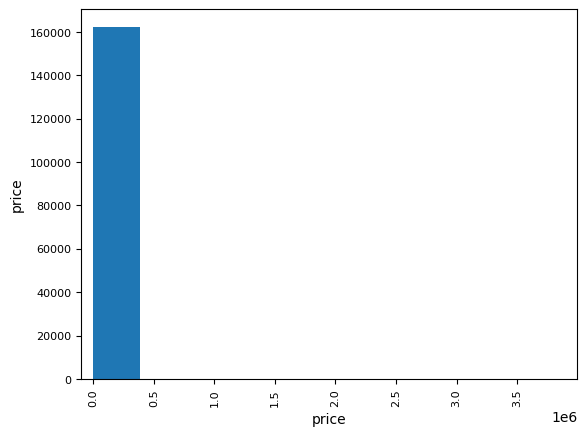

In [4]:
scatter_matrix(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162280 entries, 0 to 162312
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   category      162280 non-null  object 
 1   sub_category  162280 non-null  object 
 2   href          162280 non-null  object 
 3   items         162280 non-null  object 
 4   price         162280 non-null  float64
dtypes: float64(1), object(4)
memory usage: 7.4+ MB


In [6]:
num_features = ['price']
cat_features = ['category', 'sub_category', 'href', 'items']

In [29]:
train_df, test_df = train_test_split(df, test_size=0.1)
test_df

,category,sub_category,href,items,price
5806,Groceries,Staples,https://www.jiomart.com/c/groceries/staples/sa...,Classic Harvest Pure Jaggery Whole / Block Jag...,225.0
58024,Home & Kitchen,Furnishing,https://www.jiomart.com/c/groceries/home-kitch...,Riara Cotton & Poly satin Printed Comfy Square...,649.0
160243,Beauty,Fragrances,https://www.jiomart.com/c/beauty/fragrances/me...,Ajmal Silver Shade EDP Citrus Woody Perfume An...,1078.0
75904,Home & Kitchen,"Toys, Games & Fitness",https://www.jiomart.com/c/groceries/home-kitch...,Webby DIY Art and Craft Paper Cup Fun Making a...,399.0
141562,Electronics,Cameras,https://www.jiomart.com/c/electronics/cameras/...,Envie ECR 11MC Sprintx Ultra Fast Rechargeable...,949.0
...,...,...,...,...,...
136723,Electronics,TV & Speaker,https://www.jiomart.com/c/electronics/tv-speak...,Artis BT918 Trolley Bluetooth Speaker with Adj...,12999.0
46378,Home & Kitchen,Kitchenware,https://www.jiomart.com/c/groceries/home-kitch...,Euro Sleek Red Aluminium Non Stick 12 Cavities...,259.0
67432,Home & Kitchen,Home Decor,https://www.jiomart.com/c/groceries/home-kitch...,Fancy Mart Yellow Icelandic Artificial Flowers...,466.0
16148,Groceries,Beverages,https://www.jiomart.com/c/groceries/beverages/...,Red Label Leaf Tea 250 g (Carton),134.0


In [62]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler()),
])

pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", OneHotEncoder(), cat_features)
])

score_transform = Pipeline([('pass', 'passthrough')])

X_train = pipeline.fit_transform(train_df)
Y_train = score_transform.fit_transform(train_df[['price']])
Y_train = Y_train.astype(int)

X_test = pipeline.fit_transform((test_df))
Y_test = score_transform.fit_transform(test_df[['price']])
X_test = X_test.toarray()
Y_test = Y_test.astype(int)

In [63]:
X_test, Y_test

(array([[-0.15599289,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.11840424,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.08037234,  1.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.13462764,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.16406026,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.13773048,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]),
         price
 5806      225
 58024     649
 160243   1078
 75904     399
 141562    949
 ...       ...
 136723  12999
 46378     259
 67432     466
 16148     134
 130329    431
 
 [16228 rows x 1 columns])

In [64]:
model = DecisionTreeClassifier()
model.fit(X_test, Y_test)

DecisionTreeClassifier()

In [65]:
Y_hat = model.predict(X_test)

In [66]:
Y_pred = score_transform.inverse_transform(Y_hat)
Y_target = score_transform.inverse_transform(Y_test)

In [67]:
error = mean_squared_error(Y_pred, Y_target)
error

0.0

In [68]:
list(zip(Y_pred, Y_target.values.flatten()))

[(225, 225),
 (649, 649),
 (1078, 1078),
 (399, 399),
 (949, 949),
 (150, 150),
 (829, 829),
 (249, 249),
 (550, 550),
 (399, 399),
 (999, 999),
 (299, 299),
 (799, 799),
 (424, 424),
 (49, 49),
 (3999, 3999),
 (899, 899),
 (699, 699),
 (1799, 1799),
 (590, 590),
 (179, 179),
 (399, 399),
 (95, 95),
 (1215, 1215),
 (1299, 1299),
 (299, 299),
 (199, 199),
 (614, 614),
 (2042, 2042),
 (35, 35),
 (399, 399),
 (699, 699),
 (749, 749),
 (299, 299),
 (298, 298),
 (2499, 2499),
 (1836, 1836),
 (1275, 1275),
 (367, 367),
 (1499, 1499),
 (242, 242),
 (105, 105),
 (760, 760),
 (1099, 1099),
 (599, 599),
 (1912, 1912),
 (169, 169),
 (249, 249),
 (1999, 1999),
 (1632, 1632),
 (192, 192),
 (1299, 1299),
 (1356, 1356),
 (364, 364),
 (2449, 2449),
 (1599, 1599),
 (999, 999),
 (12599, 12599),
 (399, 399),
 (2899, 2899),
 (403, 403),
 (46, 46),
 (909, 909),
 (525, 525),
 (399, 399),
 (797, 797),
 (599, 599),
 (638, 638),
 (475, 475),
 (199, 199),
 (1889, 1889),
 (349, 349),
 (11999, 11999),
 (249, 249)